# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.041595e+01     7.181138e+00
 * time: 0.0034809112548828125
     1     2.610439e+01     3.890638e+00
 * time: 0.010803937911987305
     2     1.905532e+01     5.525588e+00
 * time: 0.02861309051513672
     3     1.186744e+01     1.218449e+00
 * time: 0.04974102973937988
     4     1.111585e+01     3.242729e+00
 * time: 0.06346702575683594
     5     1.068920e+01     1.329959e+00
 * time: 0.07604598999023438
     6     1.020554e+01     1.511209e+00
 * time: 0.08861494064331055
     7     9.643561e+00     8.657970e-01
 * time: 0.10094690322875977
     8     9.294154e+00     1.060297e+00
 * time: 0.11309099197387695
     9     9.064558e+00     6.584376e-01
 * time: 0.12521910667419434
    10     9.046349e+00     1.665479e+00
 * time: 0.1346440315246582
    11     8.923848e+00     9.663185e-01
 * time: 0.14670205116271973
    12     8.839058e+00     9.251881e-01
 * time: 0.15586304664611816
    13     8.748549e+00     5.562909e-01
 * tim

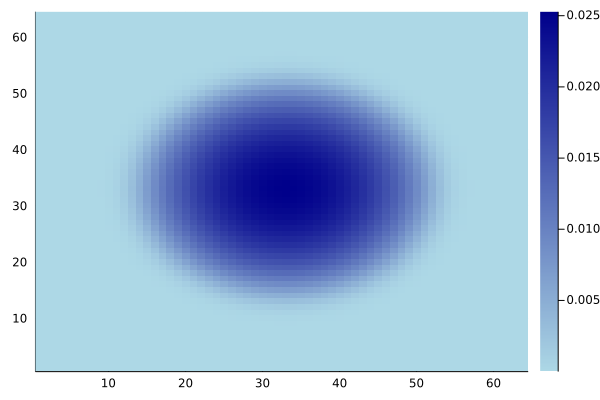

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)